In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip


In [2]:
import os
import pandas as pd
import tensorflow as tf


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv("/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip")
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.iloc[3]['comment_text']

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

In [5]:
df[df.columns[2:]].iloc[3]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 3, dtype: int64

In [6]:
from tensorflow.keras.layers import TextVectorization

In [7]:
X=df['comment_text']
y=df[df.columns[2:]].values
y.shape

(159571, 6)

In [8]:
max_features=200000

In [9]:
vectorizer=TextVectorization(max_tokens=max_features,output_sequence_length=1800,output_mode='int')

In [10]:
vectorizer.adapt(X.values)
vectorizer('Hii this is Thomas Shelby')[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=
array([22305,    14,     9,  2422, 15647,     0,     0,     0,     0,
           0])>

In [11]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [12]:
vectorized_text=vectorizer(X.values)

In [13]:
vectorized_text.shape  ###[#examples,max no. of words]

TensorShape([159571, 1800])

In [14]:
##It's a common pipeline for preparing data for training.
##MCShBaP: map,cache,shuffle,batch,prefetch
dataset=tf.data.Dataset.from_tensor_slices((vectorized_text,y))  ##each element is a tuple containing a slice of 'vectorized_text' and a corresponding slice of 'y' along the first dimension.
dataset=dataset.cache()   ###the first time you iterate over the dataset, the elements will be loaded and cached
dataset=dataset.shuffle(160000)  ###it shuffles the elements of the dataset randomly based on a given buffer size.
dataset=dataset.batch(16)   ### it groups the elements of the dataset into batches of a specified size.
dataset=dataset.prefetch(8)  ##it prefetches elements from the dataset, allowing the next batch of data to be prepared while the current batch is being processed by the model.

In [15]:
batch_x,batch_y=dataset.as_numpy_iterator().next()

In [16]:
batch_x.shape

(16, 1800)

In [17]:
int(len(dataset)*.7)

6981

In [18]:
train=dataset.take(int(len(dataset)*.7))
val=dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test=dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [19]:
print(len(train),len(val),len(test))


6981 1994 997


In [20]:
train_generator=train.as_numpy_iterator()

In [21]:
train_generator.next()

(array([[  733, 22599,  1578, ...,     0,     0,     0],
        [    2,   736,    25, ...,     0,     0,     0],
        [ 2599, 19516,    23, ...,     0,     0,     0],
        ...,
        [  313,   171,     8, ...,     0,     0,     0],
        [  171,   136,   424, ...,     0,     0,     0],
        [ 2403,    21,    77, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Bidirectional,Dense,Embedding


In [23]:
y[0]

array([0, 0, 0, 0, 0, 0])

In [24]:
model=Sequential()

model.add(Embedding(max_features+1,32))

model.add(Bidirectional(LSTM(32,activation='tanh')))  ##LSTM layer is run in both the forward and backward directions. This allows the model to capture context from both directions of the input sequence
## Fully connector layers
model.add(Dense(128,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
## Final layer
model.add(Dense(6,activation='sigmoid'))

In [25]:
model.compile(optimizer='adam',loss='BinaryCrossentropy')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [27]:
history=model.fit(train,epochs=5,validation_data=val)

Epoch 1/5
6981/6981 [==============================] - 719s 101ms/step - loss: 0.0632 - val_loss: 0.0434
Epoch 2/5
6981/6981 [==============================] - 590s 84ms/step - loss: 0.0457 - val_loss: 0.0398
Epoch 3/5
6981/6981 [==============================] - 586s 84ms/step - loss: 0.0406 - val_loss: 0.0339
Epoch 4/5
6981/6981 [==============================] - 586s 84ms/step - loss: 0.0359 - val_loss: 0.0308
Epoch 5/5
6981/6981 [==============================] - 586s 84ms/step - loss: 0.0322 - val_loss: 0.0283


In [28]:
history.history

{'loss': [0.06324083358049393,
  0.045729320496320724,
  0.0406484492123127,
  0.035878319293260574,
  0.03216387331485748],
 'val_loss': [0.043361663818359375,
  0.039821576327085495,
  0.033934786915779114,
  0.030781449750065804,
  0.028279557824134827]}

<Figure size 800x500 with 0 Axes>

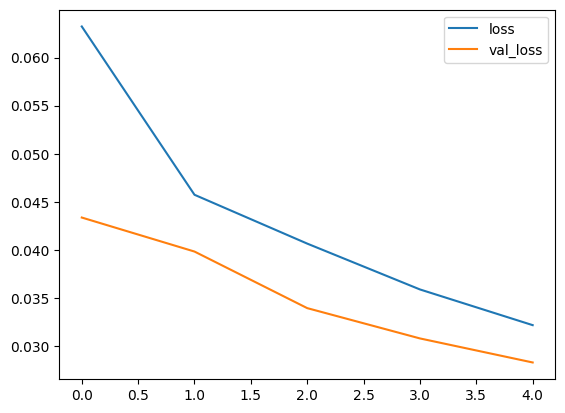

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [30]:
input_text=vectorizer("You freaking suck.Holy crap,it's terrifying")
input_text[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([    7,  7158,     1,     1, 21806])>

In [31]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

**Used to add an extra dimension to the input text so that it can be fed into the model for prediction..It is adding an extra dimension at position 0 to the input_text variable.**

In [32]:
model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 1s 811ms/step


array([[0.88229376, 0.00486732, 0.12698206, 0.00920615, 0.51446986,
        0.02490856]], dtype=float32)

In [33]:
test.as_numpy_iterator().next()

(array([[   14,    24,    25, ...,     0,     0,     0],
        [    8,   178,    10, ...,     0,     0,     0],
        [  484,   482,     7, ...,     0,     0,     0],
        ...,
        [ 1732,   121,     2, ...,     0,     0,     0],
        [35643,    11,   481, ...,     0,     0,     0],
        [  179,     2,  2669, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [34]:
batch_X,batch_y=test.as_numpy_iterator().next()

In [35]:
batch_y

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [36]:
(model.predict(batch_X)>0.5).astype(int)

1/1 [==============================] - 0s 73ms/step


array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0]])

In [37]:
res=model.predict(batch_X)
res.flatten()

1/1 [==============================] - 0s 71ms/step


array([7.49118090e-01, 3.27392889e-04, 2.82742921e-02, 1.55877648e-03,
       8.81443098e-02, 2.47407262e-03, 4.16334672e-03, 2.43336218e-09,
       3.05608119e-05, 5.45505900e-04, 1.10041183e-04, 1.23896070e-05,
       5.35642721e-06, 6.76560484e-19, 7.05580261e-10, 2.61158384e-08,
       1.16029666e-08, 1.21168839e-11, 7.13761074e-06, 1.79025439e-18,
       1.30471012e-09, 2.18967724e-08, 2.06360919e-08, 1.80730205e-11,
       1.62162860e-06, 1.22079499e-20, 9.05754499e-11, 4.48571358e-09,
       1.91776128e-09, 9.66108161e-13, 1.67399701e-02, 1.41242268e-07,
       4.86611010e-04, 1.26700057e-03, 9.28821566e-04, 9.38374797e-05,
       2.66157858e-05, 1.47881140e-16, 9.74294867e-09, 2.69025605e-07,
       1.13172405e-07, 3.31118549e-10, 1.13434799e-05, 7.84776439e-18,
       2.26120145e-09, 8.93463508e-08, 3.13956008e-08, 6.07228989e-11,
       1.93463329e-05, 4.59101089e-17, 6.29174446e-09, 1.14991792e-07,
       7.47641025e-08, 1.35359182e-10, 5.45865669e-06, 8.46208145e-19,
      

In [38]:
from tensorflow.keras.metrics import Precision,Recall,CategoricalAccuracy

In [39]:
pre=Precision()
re=Recall()
acc=CategoricalAccuracy()

In [40]:
for batch in test.as_numpy_iterator():
    X_true,y_true=batch
    yhat=model.predict(X_true)
    
    y_true=y_true.flatten()
    yhat=yhat.flatten()
    
    pre.update_state(y_true,yhat)
    re.update_state(y_true,yhat)
    acc.update_state(y_true,yhat)

1/1 [==============================] - 0s 57ms/step


In [41]:
print(f"Precision:{pre.result().numpy()},Recall:{re.result().numpy},Accuracy:{acc.result().numpy()}")

Precision:0.8721434473991394,Recall:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.84430134>>,Accuracy:0.5015045404434204


In [42]:
!pip install gradio jinja2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 54.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.2/294.2 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 6.4 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.1-py3-none-any.whl size=5596 sha256=e238aa260f5371b4bb30de40f2a734067b0cba8d3819b3ed9cfa036217abef39
  Stored in directory: /root/.cache/pip/wheels/01/a6/d1/1c0828c304a4283b2c1639a09ad86f83d7c487ef34c6b4a1bf
Successfully built ffmpy
  Attempting uninstall: mdit-py-plugins
    Found existing installation: mdit-py-plugins 0.3.5
    Uninstal

In [43]:
import gradio as gr


In [44]:
model.save("toxicity.h5")

In [45]:
model=tf.keras.models.load_model("toxicity.h5")

In [46]:
input_str=vectorizer("hey i freaken hate you")

In [47]:
res=model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 727ms/step


In [48]:
res

array([[0.84987766, 0.00277508, 0.03690564, 0.01988265, 0.3103313 ,
        0.04484662]], dtype=float32)

In [49]:
def score_comment(comment):
    vectorized_comment=vectorizer([comment])
    results=model.predict(vectorized_comment)
    
    text=''
    for idx,col in enumerate(df.columns[2:]):
        text+='{}: {}\n'.format(col,results[0][idx]>0.5)
        
    return text

In [50]:
interface=gr.Interface(fn=score_comment,inputs=gr.inputs.Textbox(lines=2,placeholder="Comment to score"),
                      outputs="text")

### gr.INTERFACE:This is the main class of the gradio library that is used to create interfaces.
### fn=score_comment: This is the function that will be wrapped and executed when the interface is used
### inputs=gr.inputs.Textbox(lines=2,placeholder="Comment to score"): This sets the input field for the interface to be a two-line textbox with a placeholder text "Comment to score"
### outputs="text": This sets the output of the interface to be a single line of text, indicating the score or sentiment for the input comment.

/tmp/ipykernel_31/1900100736.py:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  interface=gr.Interface(fn=score_comment,inputs=gr.inputs.Textbox(lines=2,placeholder="Comment to score"),
/tmp/ipykernel_31/1900100736.py:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  interface=gr.Interface(fn=score_comment,inputs=gr.inputs.Textbox(lines=2,placeholder="Comment to score"),
/tmp/ipykernel_31/1900100736.py:1: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  interface=gr.Interface(fn=score_comment,inputs=gr.inputs.Textbox(lines=2,placeholder="Comment to score"),


In [2]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model,batch_x,batch_y,cmap="inferno"
                                     display_labels=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2622531896.py, line 3)

In [51]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://bfbdead2d90541307f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
